In [1]:
# TimeSeries generation of sin(x) function. Basically given the values of sin(x) upto t, the RNN should be able to generate
# the sequence upto t+1

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
class TimeSeriesData():
    """
    TimeSeriesData here is simply a class that can generate data of sin function. 
    When we create an instance of this class we are going to provide the num_points and the xmin and xmax values
    """
    def __init__(self, num_points, x_min, x_max):
        """
        The initialization step involves creating a few more variables like
        
        resolution that defines how close the points should be to one another. Since this is going to generate a 
        TimeSeries resolution defines the literal resolution of the points
        
        x_data which are the equally spaced points from xmin to xmax 
        y_true will be the original sin wave corresponding to x_data
        """
        self.x_min = x_min
        self.x_max = x_max
        self.num_points = num_points
        self.resolution = (x_max - x_min)/num_points
        self.x_data = np.linspace(x_min, x_max, num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        
        # Grab a random starting point for each batch of the data
        rand_start = np.random.rand(batch_size, 1) # this will give a column vector of dim: batch_size X 1
        print(rand_start)
        
        # Convert to be on time series
        ts_start = rand_start * (self.x_max - self.x_min - (steps * self.resolution))
        print(ts_start)
        
        # Create batch time series on the X data
        batch_ts = ts_start + np.arange(0.0, steps + 1) * self.resolution
        print(batch_ts)
        
        # Create the y data for the time series x axis from the previous step
        y_batch = np.sin(batch_ts)
        print(y_batch)
        
        # Formatting for RNN
        if return_batch_ts:
            # Here note that the first value being returned is the time series itself and
            # the second value being returned is the time series shifted by one step
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [49]:
ts_data = TimeSeriesData(250,0,10)

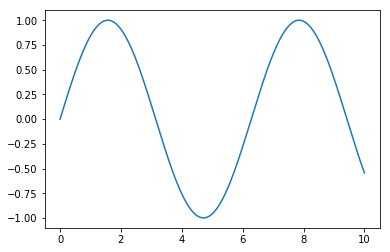

In [50]:
plt.plot(ts_data.x_data, ts_data.y_true)

In [51]:
num_time_steps = 30 # number of time steps in one batch

In [53]:
y1,y2,ts = ts_data.next_batch(batch_size=1, steps=30, return_batch_ts=True) # basically give me back one batch of 30 samples

[[0.43778924]]
[[3.85254528]]
[[3.85254528 3.89254528 3.93254528 3.97254528 4.01254528 4.05254528
  4.09254528 4.13254528 4.17254528 4.21254528 4.25254528 4.29254528
  4.33254528 4.37254528 4.41254528 4.45254528 4.49254528 4.53254528
  4.57254528 4.61254528 4.65254528 4.69254528 4.73254528 4.77254528
  4.81254528 4.85254528 4.89254528 4.93254528 4.97254528 5.01254528
  5.05254528]]
[[-0.65255591 -0.68233548 -0.71102345 -0.73857394 -0.76494287 -0.79008805
  -0.81396926 -0.8365483  -0.85778903 -0.87765749 -0.89612188 -0.91315266
  -0.9287226  -0.94280678 -0.95538267 -0.96643015 -0.97593155 -0.98387166
  -0.99023779 -0.99501976 -0.9982099  -0.99980312 -0.99979687 -0.99819116
  -0.99498855 -0.99019417 -0.9838157  -0.97586333 -0.96634978 -0.95529029
  -0.94270253]]


In [54]:
 ts.flatten()

array([3.85254528, 3.89254528, 3.93254528, 3.97254528, 4.01254528,
       4.05254528, 4.09254528, 4.13254528, 4.17254528, 4.21254528,
       4.25254528, 4.29254528, 4.33254528, 4.37254528, 4.41254528,
       4.45254528, 4.49254528, 4.53254528, 4.57254528, 4.61254528,
       4.65254528, 4.69254528, 4.73254528, 4.77254528, 4.81254528,
       4.85254528, 4.89254528, 4.93254528, 4.97254528, 5.01254528,
       5.05254528])

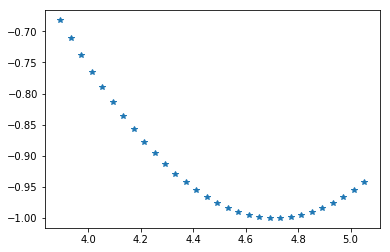

In [55]:
plt.plot(ts.flatten()[1:], y2.flatten(), '*') # remember batch_ts or ts here has 31 steps

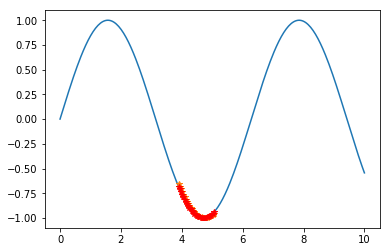

In [56]:
plt.plot(ts_data.x_data, ts_data.y_true, label='Sin(t)')
plt.plot(ts.flatten()[1:], y1.flatten(), '*', label="Single Training instance shifted by one")
plt.plot(ts.flatten()[1:], y2.flatten(), 'r*', label="Single Training instance")

In [59]:
train_inst = np.linspace(5, 5 + ts_data.resolution * (num_time_steps + 1), num_time_steps + 1)

In [60]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

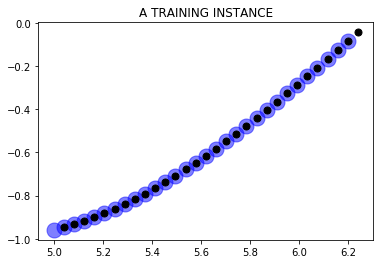

In [62]:
plt.title('A TRAINING INSTANCE')
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize=15, alpha=0.5, label="INSTANCE")
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), 'ko', markersize=7, label='TARGET')